In [1]:
import sys,os 
os.chdir('.\..\..')

In [2]:
import deep_nn.deep_nn_model as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [3]:
train = pd.read_csv("./data_analysis/projekt1/classification/dl/data.three_gauss.train.10000.csv")
test = pd.read_csv("./data_analysis/projekt1/classification/dl/data.three_gauss.test.10000.csv")

In [4]:
X = train[['x', 'y']].values.T
Xt = test[['x', 'y']].values.T
print(X.shape)
y = train.cls.values.reshape(1, -1)
yt = test.cls.values.reshape(1, -1)
y.shape

(2, 30000)


(1, 30000)

In [7]:
enc = OneHotEncoder()
Y = enc.fit_transform(train.cls.values.reshape(-1,1))
Yt = enc.fit_transform(test.cls.values.reshape(-1,1))

c:\program files\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\program files\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you 

In [8]:
model_builder = nn.SequentialBuilder()
model_builder.add_dense(2, "relu")
model_builder.add_dense(12, "relu")
model_builder.add_dense(13, "relu")
model_builder.add_dense(7, "relu")
model_builder.add_dense(3, "softmax")
model = model_builder.compile(loss = 'categorical_crossentropy')

In [9]:
parameters, costs = model.fit(X, Y.A.T, momentum=0.9, num_epochs=500, learning_rate=0.05)

Cost after epoch 0: 0.623057


In [11]:
costs

[0.6230567756309315]

In [12]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :].reshape(1, -1), c=y.ravel(), cmap=plt.cm.Spectral)
    
    plt.savefig('multiclass2.jpg')
    plt.show()

In [13]:
p = model.predict(X)

In [14]:
pt = model.predict(X)

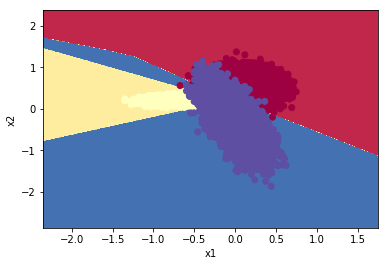

In [15]:
plot_decision_boundary(lambda x: model.predict_classes(x.T), X, y)

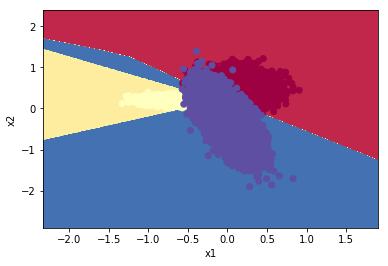

In [16]:

plot_decision_boundary(lambda x: model.predict_classes(x.T), Xt, yt)
